# Space Titanic dataset analyse

Import required packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np

# Load the dataset

In [2]:
filename = "train.csv"
df = pd.read_csv(os.path.join("data", filename))

# Inspect the dataset

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
print(f"Shape: {df.shape}")
print()
print(f"Datatypes:\n{df.dtypes}")

print()

Shape: (8693, 14)

Datatypes:
PassengerId      object
HomePlanet       object
CryoSleep        object
Cabin            object
Destination      object
Age             float64
VIP              object
RoomService     float64
FoodCourt       float64
ShoppingMall    float64
Spa             float64
VRDeck          float64
Name             object
Transported        bool
dtype: object



train.csv - Personal records for about two-thirds (~8700) of the passengers, to be used as training data.
- PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.
- HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.
- CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.
- Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.
- Destination - The planet the passenger will be debarking to.
- Age - The age of the passenger.
- VIP - Whether the passenger has paid for special VIP service during the voyage.
- RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.
- Name - The first and last names of the passenger.
- Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

Source: https://www.kaggle.com/competitions/spaceship-titanic/data

## Inspect missing values

In [5]:
df[df.isna().sum(axis=1) > 0]

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
7,0006_02,Earth,True,G/0/S,TRAPPIST-1e,28.0,False,0.0,0.0,0.0,0.0,NaN,Candra Jacostaffey,True
10,0008_02,Europa,True,B/1/P,TRAPPIST-1e,34.0,False,0.0,0.0,NaN,0.0,0.0,Altardr Flatic,True
15,0012_01,Earth,False,NaN,TRAPPIST-1e,31.0,False,32.0,0.0,876.0,0.0,0.0,Justie Pooles,False
16,0014_01,Mars,False,F/3/P,55 Cancri e,27.0,False,1286.0,122.0,NaN,0.0,0.0,Flats Eccle,False
23,0020_03,Earth,True,E/0/S,55 Cancri e,29.0,False,0.0,0.0,NaN,0.0,0.0,Mollen Mcfaddennon,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8667,9250_01,Europa,False,E/597/P,TRAPPIST-1e,29.0,False,0.0,2972.0,NaN,28.0,188.0,Chain Reedectied,True
8674,9257_01,NaN,False,F/1892/P,TRAPPIST-1e,13.0,False,39.0,0.0,1085.0,24.0,0.0,Ties Apple,False
8675,9259_01,Earth,NaN,F/1893/P,TRAPPIST-1e,44.0,False,1030.0,1015.0,0.0,11.0,NaN,Annah Gilleyons,True
8684,9274_01,NaN,True,G/1508/P,TRAPPIST-1e,23.0,False,0.0,0.0,0.0,0.0,0.0,Chelsa Bullisey,True


In [6]:
df[df.isna().sum(axis=1) > 0].isna().sum(axis=1).value_counts()

1    1867
2     203
3      17
Name: count, dtype: int64

In [7]:
df[df["HomePlanet"].isna()].isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep         2
Cabin             6
Destination       4
Age               2
VIP               3
RoomService       6
FoodCourt         2
ShoppingMall      7
Spa               3
VRDeck            1
Name              7
Transported       0
dtype: int64

In [8]:
df["CryoSleep"].value_counts()

CryoSleep
False    5439
True     3037
Name: count, dtype: int64

In [9]:
df[df["CryoSleep"]==True].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,2955.000000,2969.0,2967.0,2941.0,2972.0,2975.0
mean,27.405415,0.0,0.0,0.0,0.0,0.0
std,15.080469,0.0,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0
25%,18.000000,0.0,0.0,0.0,0.0,0.0
50%,26.000000,0.0,0.0,0.0,0.0,0.0
75%,37.000000,0.0,0.0,0.0,0.0,0.0
max,78.000000,0.0,0.0,0.0,0.0,0.0


Conclusions:
 - Dataset contains 8693 rows described by 14 attributes
 - Columns are either floats or strings. Only target column is bool.
 - Almost all columns contain around 200 missing values. The majority of rows have 0 or 1 missing values.
    - 1867 rows have one missing value. Because of large percentage of those rows in dataset, some imputation will be needed.
    - Only 203 rows have 2 missing values. Only 17 rows have 3 missing values. There is no row with more than 3 missing values.
 - Column 'Transported' is target, that we have to predict.
 - 'Passenger_id' column contains two numbers: first indicates a group (number of ticket?) the passenger is travelling with. Second number is their number within the group.
 - 'CryoSleep' columns indicate whether passenger is confied to his room. Those people don't spend any money - this information will be helpful for data imputing.
 - VIP passenger has paid for special services
 - Last name of passenger may indicate, if passengers in group are a family.
 

Things to do during feature engineering and data cleaning phase:
 - impute missing values or remove rows containing them.
 - divide columns PassengerId and Cabin into more atomic attributes
 - bucketize 'Age' and expenses columns
 - Create new features: 'is_travelling_alone', 'is_travelling_with_family'

# Data preparation

Data cleaning and feature engineering that will faciliate analysis and help to get better predictions.

## Create new columns

### Divide id column 

In [10]:
df[["TicketId", "InvidualId"]] = df["PassengerId"].str.split("_", expand=True)
# df = df.drop(columns="PassengerId")
# df = df.set_index(["TicketId", "InvidualId"])

### Divide name column

In [11]:
df[["FirstName", "LastName"]] = df["Name"].str.split(" ", expand=True)

Actually, I don't think that we need FirstName for this analysis. Although LastName column will help us to determine, if travellers sharing the ticket are a family.

In [12]:
df = df.drop(columns=["FirstName", "Name"])

### Divide cabin column

In [13]:
df[["Deck", "Num", "Side"]] = df["Cabin"].str.split("/", expand=True)
df["Num"] = df["Num"].astype('Int16')

Deck  Transported
A     False           129
      True            127
B     True            572
      False           207
C     True            508
      False           239
D     False           271
      True            207
E     False           563
      True            313
F     False          1565
      True           1229
G     True           1321
      False          1238
T     False             4
      True              1
Name: count, dtype: int64


<Axes: xlabel='Deck'>

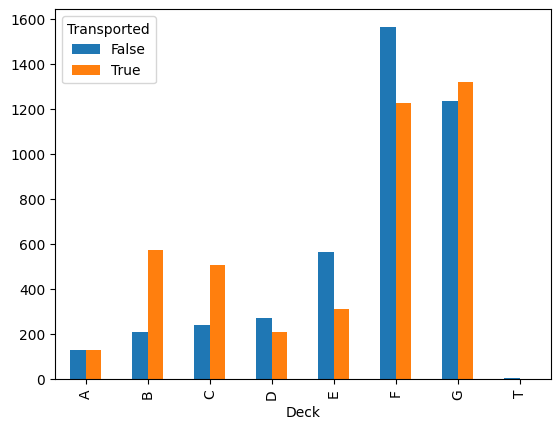

In [14]:
print(df.groupby("Deck")["Transported"].value_counts())
df.groupby("Deck")["Transported"].value_counts().unstack().plot(kind="bar")

Side  Transported
P     False          2308
      True           1898
S     True           2380
      False          1908
Name: count, dtype: int64


<Axes: xlabel='Side'>

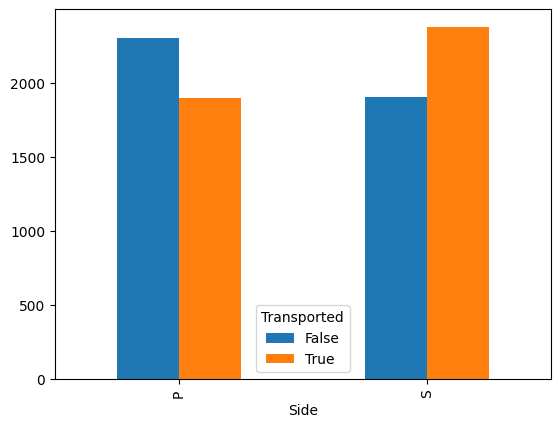

In [15]:
print(df.groupby("Side")["Transported"].value_counts())
df.groupby("Side")["Transported"].value_counts().unstack().plot(kind="bar")

In [16]:
df["Num_bucket"] = df["Num"].apply(lambda x: x // 100 * 100) 

<Axes: xlabel='Num_bucket'>

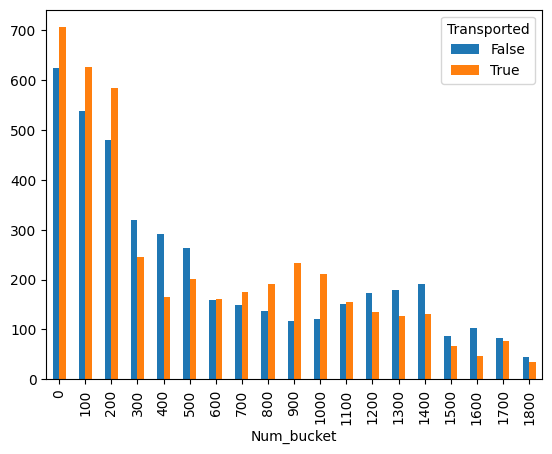

In [17]:
df_g = df.groupby("Num_bucket")["Transported"].value_counts().unstack()
df.groupby("Num_bucket")["Transported"].value_counts().unstack().plot(kind="bar")

As we can see, survivability differs significantly among different decks and sides of ship. Also room's number seem to suggest us, if particular person could survive. I imagine that rooms are placed in particular order, and some of them may be easier to evacuate from.

After creating those new features, I won't be needing original Cabin column anymore

In [18]:
df = df.drop(columns=["Cabin"])

### Total spend

In [19]:
expenses_columns = ["RoomService", "FoodCourt", "ShoppingMall", "Spa", "VRDeck"]
df["Total spendings"] = df[expenses_columns].sum(axis=1)

In [20]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bucket,Total spendings
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Ofracculy,B,0,P,0,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Vines,F,0,S,0,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Susent,A,0,S,0,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,Susent,A,0,S,0,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,Santantines,F,1,S,0,1091.0


## Impute values

In [21]:
def fill_na_with_sample(df, src_col, src_cat_val, col_to_fill):
    for_sample = df[df[src_col] == src_cat_val][col_to_fill].value_counts(normalize=True)
    n_empty = df[df[src_col] == src_cat_val][col_to_fill].isna().sum()

    random_gen = np.random.default_rng()
    random_vals = random_gen.choice(for_sample.index.to_list(),
                           size=n_empty,
                           p=for_sample.values.tolist())
    
    df.loc[(df[src_col].dropna() == src_cat_val) & (df[col_to_fill].isna()), col_to_fill] = random_vals

### Impute HomePlanet

In [22]:
df.groupby("Deck")["HomePlanet"].value_counts()

Deck  HomePlanet
A     Europa         252
B     Europa         766
C     Europa         734
D     Mars           282
      Europa         186
E     Earth          395
      Mars           330
      Europa         128
F     Earth         1614
      Mars          1110
G     Earth         2498
T     Europa           4
Name: count, dtype: int64

In [23]:
df.groupby("Destination")["HomePlanet"].value_counts()

Destination    HomePlanet
55 Cancri e    Europa         886
               Earth          690
               Mars           193
PSO J318.5-22  Earth          712
               Mars            49
               Europa          19
TRAPPIST-1e    Earth         3101
               Mars          1475
               Europa        1189
Name: count, dtype: int64

I'll impute HomePlanet value based on Destination first. For the rest I'll use deck column. If there still some rows will have null value for HomePlanet, then they will be removed, because I'll need this value to predict other ones. 

In [24]:
fill_na_with_sample(df, "Destination", "55 Cancri e", "HomePlanet")
fill_na_with_sample(df, "Destination", "PSO J318.5-22", "HomePlanet")
fill_na_with_sample(df, "Destination", "TRAPPIST-1e", "HomePlanet")

In [25]:
for deck in df["Deck"].dropna().unique():
    fill_na_with_sample(df, "Deck", deck, "HomePlanet")

In [26]:
df = df.dropna(subset="HomePlanet")

### Impute cryosleep

As I found out at the beginning of this notebook, people that are in cryosleep don't spend any money. So we can easily fill at least some of the missing values, in columns "CryoSleep" and those containing info about expenses.

In [27]:
df.loc[(df["CryoSleep"].isna()) & (df["Total spendings"] == 0), "CryoSleep"] = False
df.loc[(df["CryoSleep"].isna()) & (df["Total spendings"] > 0), "CryoSleep"] = True

In [28]:
df.loc[(df["CryoSleep"] == True), expenses_columns] = 0

Update Total_spendings column

In [29]:
df["Total spendings"] = df[expenses_columns].sum(axis=1)

### Create  column `is_travelling_in_group`
This column will let us know, if particular person travells with others on shared ticket.

In [30]:
df["InvidualId"].unique()

array(['01', '02', '03', '04', '05', '06', '07', '08'], dtype=object)

In [31]:
df.loc[:, "is_travelling_in_group"] = False

In [32]:
df.loc[(df.duplicated("TicketId", keep=False)), "is_travelling_in_group"] = True

In [33]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,Transported,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bucket,Total spendings,is_travelling_in_group
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,False,0001,01,Ofracculy,B,0,P,0,0.0,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,True,0002,01,Vines,F,0,S,0,736.0,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,False,0003,01,Susent,A,0,S,0,10383.0,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,False,0003,02,Susent,A,0,S,0,5176.0,True
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,True,0004,01,Santantines,F,1,S,0,1091.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,False,9276,01,Noxnuther,A,98,P,0,8536.0,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,...,False,9278,01,Mondalley,G,1499,S,1400,0.0,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,True,9279,01,Connon,G,1500,S,1500,1873.0,False
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,False,9280,01,Hontichre,E,608,S,600,4637.0,True


### Create  column `is_travelling_with_family`
This column will let us know, if particular person travells on shared ticket with people with the same LastName (I assume that they are family members)

In [34]:
df.loc[:, "is_travelling_with_family"] = False

In [35]:
df.loc[df["is_travelling_in_group"] & (df.duplicated("LastName", keep=False)), "is_travelling_with_family"] = True

In [36]:
df

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,...,TicketId,InvidualId,LastName,Deck,Num,Side,Num_bucket,Total spendings,is_travelling_in_group,is_travelling_with_family
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,...,0001,01,Ofracculy,B,0,P,0,0.0,False,False
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,...,0002,01,Vines,F,0,S,0,736.0,False,False
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,...,0003,01,Susent,A,0,S,0,10383.0,True,True
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,...,0003,02,Susent,A,0,S,0,5176.0,True,True
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,...,0004,01,Santantines,F,1,S,0,1091.0,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,...,9276,01,Noxnuther,A,98,P,0,8536.0,False,False
8689,9278_01,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,...,9278,01,Mondalley,G,1499,S,1400,0.0,False,False
8690,9279_01,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,...,9279,01,Connon,G,1500,S,1500,1873.0,False,False
8691,9280_01,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,...,9280,01,Hontichre,E,608,S,600,4637.0,True,True


In [37]:
print(df["is_travelling_in_group"].value_counts())
print(df["is_travelling_with_family"].value_counts())


is_travelling_in_group
False    4805
True     3888
Name: count, dtype: int64
is_travelling_with_family
False    4842
True     3851
Name: count, dtype: int64


<Axes: xlabel='is_travelling_in_group'>

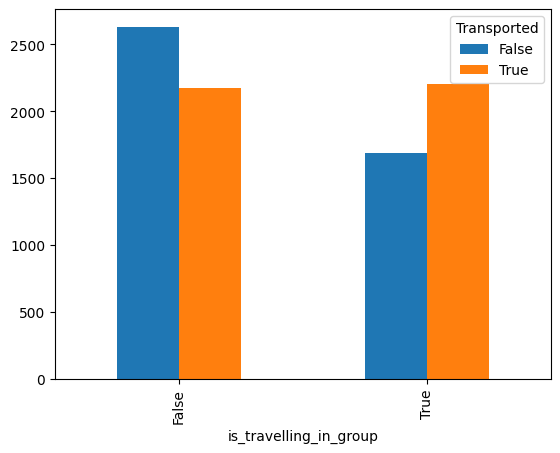

In [38]:
df.groupby("is_travelling_in_group")["Transported"].value_counts().unstack().plot(kind="bar")

<Axes: xlabel='is_travelling_with_family'>

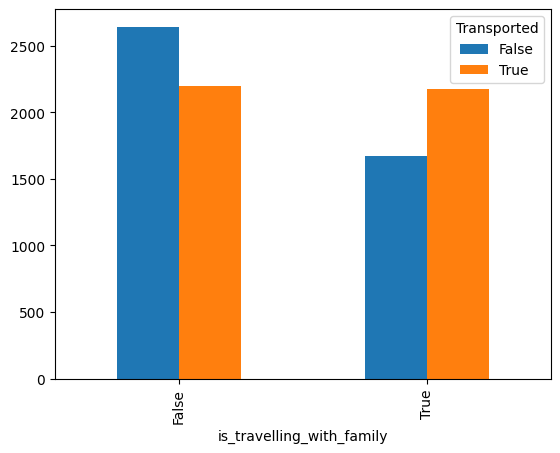

In [39]:
df.groupby("is_travelling_with_family")["Transported"].value_counts().unstack().plot(kind="bar")

In [40]:
df.loc[(df["is_travelling_in_group"] == True) & (df["is_travelling_with_family"] == False), "Transported"].value_counts()

Transported
True     26
False    11
Name: count, dtype: int64

Even though distributions for people travelling in groups and travelling with families aren't equal, they are very similar. Therefore I remove is_travelling_with_family column, because I think that this data doesn't bring useful information.

I don't need column LastName anymore, so I drop it too.

In [41]:
df = df.drop(columns=["is_travelling_with_family", "LastName"])

In [42]:
df.isna().sum(axis=0)

PassengerId                 0
HomePlanet                  0
CryoSleep                   0
Destination               182
Age                       179
VIP                       203
RoomService               111
FoodCourt                 111
ShoppingMall              107
Spa                       115
VRDeck                    124
Transported                 0
TicketId                    0
InvidualId                  0
Deck                      199
Num                       199
Side                      199
Num_bucket                199
Total spendings             0
is_travelling_in_group      0
dtype: int64

In [43]:
df[df.isna().sum(axis=1) > 0].isna().sum(axis=1).value_counts()

1    999
4    179
2     55
5     17
6      3
Name: count, dtype: int64

### Impute Age

I don't think, that spendings may be useful for predicting the age. I can't see any pattern here.

In [44]:
df["Age_bucket"] = df["Age"].apply(lambda x: x // 10 * 10) 
df.groupby("Age_bucket")["Total spendings"].describe()

,count,mean,std,min,25%,50%,75%,max
Age_bucket,,,,,,,,
0.0,679.0,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0
10.0,1479.0,807.768087,1706.576482,0.0,0.0,52.0,922.00,30478.0
20.0,2762.0,1387.081101,2449.954442,0.0,0.0,753.0,1417.00,25807.0
30.0,1735.0,2016.208069,3563.884598,0.0,0.0,827.0,2329.00,31074.0
40.0,1048.0,1895.675573,3284.895725,0.0,0.0,809.5,2039.75,31076.0
50.0,557.0,1800.705566,3223.708104,0.0,0.0,804.0,1817.00,24342.0
60.0,208.0,1871.336538,3526.699656,0.0,0.0,854.0,2365.00,35987.0
70.0,46.0,2162.391304,3758.285989,0.0,0.0,809.5,2223.25,20078.0


In [45]:
df.groupby("Deck")["Age_bucket"].describe()

,count,mean,std,min,25%,50%,75%,max
Deck,,,,,,,,
A,247.0,30.688259,13.492394,0.0,20.0,30.0,40.0,70.0
B,766.0,28.798956,13.714886,0.0,20.0,30.0,40.0,70.0
C,729.0,30.109739,13.556517,0.0,20.0,30.0,40.0,70.0
D,467.0,28.822270,13.090331,0.0,20.0,30.0,40.0,70.0
E,856.0,25.677570,12.905732,0.0,20.0,20.0,30.0,70.0
F,2748.0,24.028384,13.749353,0.0,20.0,20.0,30.0,70.0
G,2501.0,19.800080,15.222353,0.0,10.0,20.0,30.0,70.0
T,5.0,32.000000,4.472136,30.0,30.0,30.0,30.0,40.0


On lower decks there is much more people younger than average.

I impute age using average age on particular deck.

In [46]:
mean_age = df.groupby("Deck")["Age_bucket"].mean().apply(lambda x: round(x))
mean_age

Deck
A    31
B    29
C    30
D    29
E    26
F    24
G    20
T    32
Name: Age_bucket, dtype: int64

In [47]:
for deck in df["Deck"].dropna().unique():
    df.loc[(df["Age"].isna()) & (df["Deck"] == deck), "Age"] = mean_age[deck]

Recalculate age_bucket

In [48]:
df["Age_bucket"] = df["Age"].apply(lambda x: x // 10 * 10) 

### Impute VIP

In [49]:
df.groupby("VIP").describe()["Total spendings"]

,count,mean,std,min,25%,50%,75%,max
VIP,,,,,,,,
False,8291.0,1340.344711,2672.074525,0.0,0.0,696.0,1309.0,35987.0
True,199.0,4279.572864,5087.289251,0.0,1239.0,2689.0,5763.5,31076.0


In [50]:
df.loc[df["VIP"].isna()].describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Num,Total spendings,Age_bucket
count,202.000000,201.000000,201.000000,201.000000,202.000000,202.000000,197.0,203.000000,202.000000
mean,27.831683,279.323383,421.766169,93.597015,241.648515,274.871287,649.807107,1300.832512,23.564356
std,15.094771,894.644829,1769.248564,262.922559,784.039730,1169.682090,529.232235,2778.867695,15.199120
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.0,0.000000,0.000000
25%,18.250000,0.000000,0.000000,0.000000,0.000000,0.000000,208.0,0.000000,10.000000
50%,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,477.0,667.000000,20.000000
75%,38.000000,60.000000,73.000000,5.000000,81.250000,19.250000,1098.0,1191.500000,30.000000
max,65.000000,8209.000000,17432.000000,2048.000000,5907.000000,11325.000000,1858.0,19775.000000,60.000000


In [51]:
n_to_set_true = int(df["VIP"].isna().sum() * 0.025)
idx_to_set_true = df.loc[df["VIP"].isna(), "Total spendings"].sort_values(ascending=False).head(n_to_set_true).index
df.loc[idx_to_set_true, "VIP"] = True
df["VIP"] = df["VIP"].fillna(False)

Rows with missing "VIP" value tend to have similar statistics to rows that VIP column is True. Moreover, only 2.5% of all passengers had VIP status. Therefore I set "VIP" column to true for 2.5% of missing data, that have the biggest Total Spendings.

### Impute Cabin

In [52]:
df.groupby("HomePlanet")["Deck"].value_counts()

HomePlanet  Deck
Earth       G       2534
            F       1646
            E        406
            D          6
            C          6
            B          5
            A          2
Europa      B        771
            C        740
            A        254
            D        188
            E        137
            G         14
            F         13
            T          4
Mars        F       1135
            E        333
            D        284
            G         11
            B          3
            C          1
            T          1
Name: count, dtype: int64

It seems that assigning decks to passenger was based mostly on boarding place. Only passengers from Earth are located on deck G. Passengers from Mars arelocated on decks D-F, and from Europa on decks A-D. I suspect that rooms were assigned in order of boarding. 

Another thing is, that A deck seems to be the smallest and G the largest - that's how I imagine this spaceship:

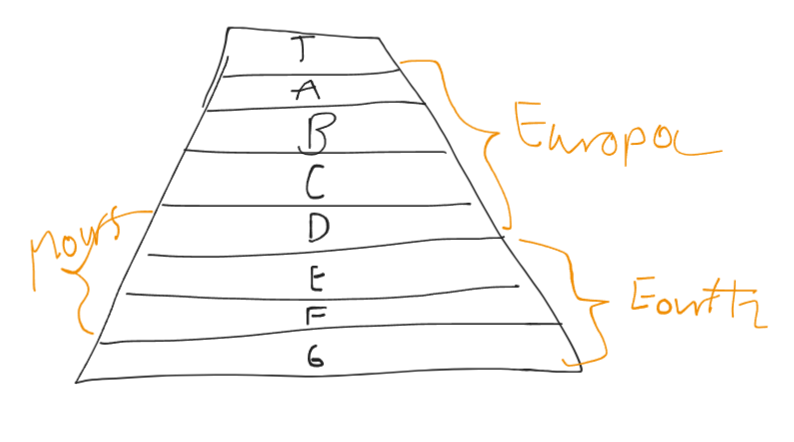

Warning:
Port and starboard means basically left and right in sailing dictionary


In [53]:
df.groupby("HomePlanet")["Side"].value_counts()

HomePlanet  Side
Earth       P       2317
            S       2288
Europa      S       1143
            P        978
Mars        P        911
            S        857
Name: count, dtype: int64

In [54]:
df.groupby("Deck")["Side"].value_counts()

Deck  Side
A     S        139
      P        117
B     S        426
      P        353
C     S        406
      P        341
D     P        248
      S        230
E     S        447
      P        429
F     P       1438
      S       1356
G     S       1283
      P       1276
T     P          4
      S          1
Name: count, dtype: int64

"Lower" decks seem to have more symmetrical distributed rooms. Of course, asymmetry would be result of some rooms being empty. We don't know exact layout of boat, we only know places where passengers are located.

In [55]:
df.groupby("HomePlanet")["Num_bucket"].value_counts()

HomePlanet  Num_bucket
Earth       100           350
            0             340
            500           322
            200           321
            400           314
            300           310
            1000          280
            1400          269
            900           267
            800           265
            600           261
            1300          256
            700           247
            1200          235
            1100          231
            1500           96
            1600           91
            1700           90
            1800           60
Europa      0             784
            100           559
            200           546
            300           159
            400            30
            500            19
            600             9
            1100            4
            1200            3
            700             2
            1700            1
            1500            1
            1300            1
            1000 

After analysing this, I think that I'll try to impute:
 - missing deck by home planet value
 - missing num and missing side by deck value

In [56]:
fill_na_with_sample(df, "HomePlanet", "Earth", "Deck")
fill_na_with_sample(df, "HomePlanet", "Mars", "Deck")
fill_na_with_sample(df, "HomePlanet", "Europa", "Deck")

Deck column was filled with random weighted sample. Weight was calculated as a ratio of count of decks among people going from particular planet

Similarly column Side will be calculated, using distribution of sides on every deck.

In [57]:
df["Deck"].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

In [58]:
for deck in df["Deck"].dropna().unique():
    fill_na_with_sample(df, "Deck", deck, "Side")

Column Num will be filled with random number. That number:
- have to be in range [0 ; max(num_on_deck)]

Number doesn't have to be unique - not every room has only one resident.

In [59]:
df.groupby("Deck")["Num"].aggregate([min, max])

C:\Users\Marcin\AppData\Local\Temp\ipykernel_16888\3220369322.py:1: FutureWarning: The provided callable <built-in function min> is currently using SeriesGroupBy.min. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "min" instead.
  df.groupby("Deck")["Num"].aggregate([min, max])
C:\Users\Marcin\AppData\Local\Temp\ipykernel_16888\3220369322.py:1: FutureWarning: The provided callable <built-in function max> is currently using SeriesGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  df.groupby("Deck")["Num"].aggregate([min, max])


,min,max
Deck,,
A,0,107
B,0,353
C,0,342
D,0,295
E,0,608
F,0,1894
G,0,1508
T,0,3


In [60]:
def fill_na_with_range(df, src_col, src_cat_val, col_to_fill):
    min_value = df.loc[df[src_col]==src_cat_val, col_to_fill].min()
    max_value = df.loc[df[src_col]==src_cat_val, col_to_fill].max()

    n_empty = df[df[src_col] == src_cat_val][col_to_fill].isna().sum()

    random_gen = np.random.default_rng()
    random_vals = random_gen.integers(min_value, max_value, size=n_empty)

    df.loc[(df[src_col].dropna() == src_cat_val) & (df[col_to_fill].isna()), col_to_fill] = random_vals
    

In [61]:
for deck in df["Deck"].dropna().unique():
    fill_na_with_range(df, "Deck", deck, "Num")

After filling this column, I need to recalculate Num_bucket column.

In [62]:
df["Num_bucket"] = df["Num"].apply(lambda x: x // 100 * 100) 

### Impute Destination

I think, that I should guess destination by HomePlanet value. Majority of passengers from all planets are going on Trappist-1e. Though, almost only people from Earth are going PSO.

In [63]:
df.groupby("HomePlanet")["Destination"].value_counts()

HomePlanet  Destination  
Earth       TRAPPIST-1e      3171
            PSO J318.5-22     725
            55 Cancri e       703
Europa      TRAPPIST-1e      1228
            55 Cancri e       899
            PSO J318.5-22      19
Mars        TRAPPIST-1e      1516
            55 Cancri e       198
            PSO J318.5-22      52
Name: count, dtype: int64

In [64]:
fill_na_with_sample(df, "HomePlanet", "Earth", "Destination")
fill_na_with_sample(df, "HomePlanet", "Mars", "Destination")
fill_na_with_sample(df, "HomePlanet", "Europa", "Destination")

### Impute Expenses

If person was put in cryosleep, then all of missing values in these columns will be filled with `0`. Otherwise they will be filled with mean value, regarding their Age and status.

In [65]:
for col in expenses_columns:
    df.loc[(df[col].isna()) & (df["CryoSleep"] == True), col] = 0

In [66]:
df.groupby(["VIP", "Age_bucket"])["Total spendings"].describe()

count         mean          std     min     25%     50%  \
VIP   Age_bucket                                                             
False 0.0          679.0     0.000000     0.000000     0.0     0.0     0.0   
      10.0        1477.0   807.253216  1707.653147     0.0     0.0    40.0   
      20.0        2849.0  1312.814672  2350.103455     0.0     0.0   736.0   
      30.0        1688.0  1933.150474  3456.997971     0.0     0.0   808.0   
      40.0        1019.0  1774.807655  3035.936828     0.0     0.0   805.0   
      50.0         530.0  1592.616981  2939.408354     0.0     0.0   780.0   
      60.0         200.0  1777.640000  3536.023623     0.0     0.0   809.5   
      70.0          43.0  2252.813953  3859.799009     0.0     0.0   815.0   
True  10.0           2.0  1188.000000   330.925974   954.0  1071.0  1188.0   
      20.0          61.0  3422.114754  3874.317661     0.0   994.0  1925.0   
      30.0          74.0  4606.162162  5722.566560     0.0  1088.5  2542.5   
      40.0          29.0  6142.724138  7012.505681     0.0  1594.0  3511.0   
      50.0          27.0  5885.407407  5313.453210     0.0  1958.0  4058.0   
      60.0           8.0  4213.750000  2412.621618  2365.0  2892.0  3194.5   
      70.0           3.0   866.333333  1500.533350     0.0     0.0     0.0   

                      75%      max  
VIP   Age_bucket                    
False 0.0            0.00      0.0  
      10.0         921.00  30478.0  
      20.0        1319.00  25807.0  
      30.0        2137.25  29608.0  
      40.0        1830.00  27842.0  
      50.0        1657.75  24342.0  
      60.0        1915.00  35987.0  
      70.0        2219.50  20078.0  
True  10.0        1305.00   1422.0  
      20.0        4889.00  19775.0  
      30.0        6498.25  31074.0  
      40.0        8536.00  31076.0  
      50.0        7922.00  22751.0  
      60.0        4319.00   9492.0  
      70.0        1299.50   2599.0

In [67]:
for col in expenses_columns:
    # print(f"{col}")
    # print(df[df[col].isna()]["CryoSleep"].value_counts())

    df[col] = df.groupby(["VIP", "Age_bucket"])[col].transform(lambda x: x.fillna(x.mean()))


In [68]:
df[df.isna().sum(axis=1) > 0].isna().sum()

PassengerId               0
HomePlanet                0
CryoSleep                 0
Destination               0
Age                       4
VIP                       0
RoomService               4
FoodCourt                 4
ShoppingMall              4
Spa                       4
VRDeck                    4
Transported               0
TicketId                  0
InvidualId                0
Deck                      0
Num                       0
Side                      0
Num_bucket                0
Total spendings           0
is_travelling_in_group    0
Age_bucket                4
dtype: int64

### Removing rows that still have missing data

In [69]:
df = df.dropna()

### Encoding non-numeric data
I'm gonna use one hot encoding for columns: HomePlanet, Destination and Side. CryoSleep, is_travelling_in_group and VIP columns will be converted from bool to int type. TicketId and InvidualId will be saved as integers. Finally, deck column will be factorized. 

In [70]:
df.select_dtypes(include=object)

,PassengerId,HomePlanet,CryoSleep,Destination,TicketId,InvidualId,Deck,Side
0,0001_01,Europa,False,TRAPPIST-1e,0001,01,B,P
1,0002_01,Earth,False,TRAPPIST-1e,0002,01,F,S
2,0003_01,Europa,False,TRAPPIST-1e,0003,01,A,S
3,0003_02,Europa,False,TRAPPIST-1e,0003,02,A,S
4,0004_01,Earth,False,TRAPPIST-1e,0004,01,F,S
...,...,...,...,...,...,...,...,...
8688,9276_01,Europa,False,55 Cancri e,9276,01,A,P
8689,9278_01,Earth,True,PSO J318.5-22,9278,01,G,S
8690,9279_01,Earth,False,TRAPPIST-1e,9279,01,G,S
8691,9280_01,Europa,False,55 Cancri e,9280,01,E,S


In [71]:
df["TicketId"] = df["TicketId"].astype(int)
df["InvidualId"] = df["InvidualId"].astype(int)
df["CryoSleep"] = df["CryoSleep"].astype(int)
df["VIP"] = df["VIP"].astype(int)

In [72]:
deck_values, codes = df["Deck"].factorize(sort=True)
df["Deck"] = deck_values
deck_values, codes = df["Side"].factorize(sort=True)
df["Side"] = deck_values

In [73]:
df = pd.get_dummies(df, columns=['HomePlanet', "Destination"], )


In [74]:
df.head()

,PassengerId,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,...,Num_bucket,Total spendings,is_travelling_in_group,Age_bucket,HomePlanet_Earth,HomePlanet_Europa,HomePlanet_Mars,Destination_55 Cancri e,Destination_PSO J318.5-22,Destination_TRAPPIST-1e
0,0001_01,0,39.0,0,0.0,0.0,0.0,0.0,0.0,False,...,0,0.0,False,30.0,False,True,False,False,False,True
1,0002_01,0,24.0,0,109.0,9.0,25.0,549.0,44.0,True,...,0,736.0,False,20.0,True,False,False,False,False,True
2,0003_01,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,False,...,0,10383.0,True,50.0,False,True,False,False,False,True
3,0003_02,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,False,...,0,5176.0,True,30.0,False,True,False,False,False,True
4,0004_01,0,16.0,0,303.0,70.0,151.0,565.0,2.0,True,...,0,1091.0,False,10.0,True,False,False,False,False,True


In [75]:
df = df.reset_index()

In [76]:
df.to_csv(os.path.join("data", "transformed.csv"), index=False)